In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Load the dataset
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [15]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [16]:
# Exploratory Data Analysis
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


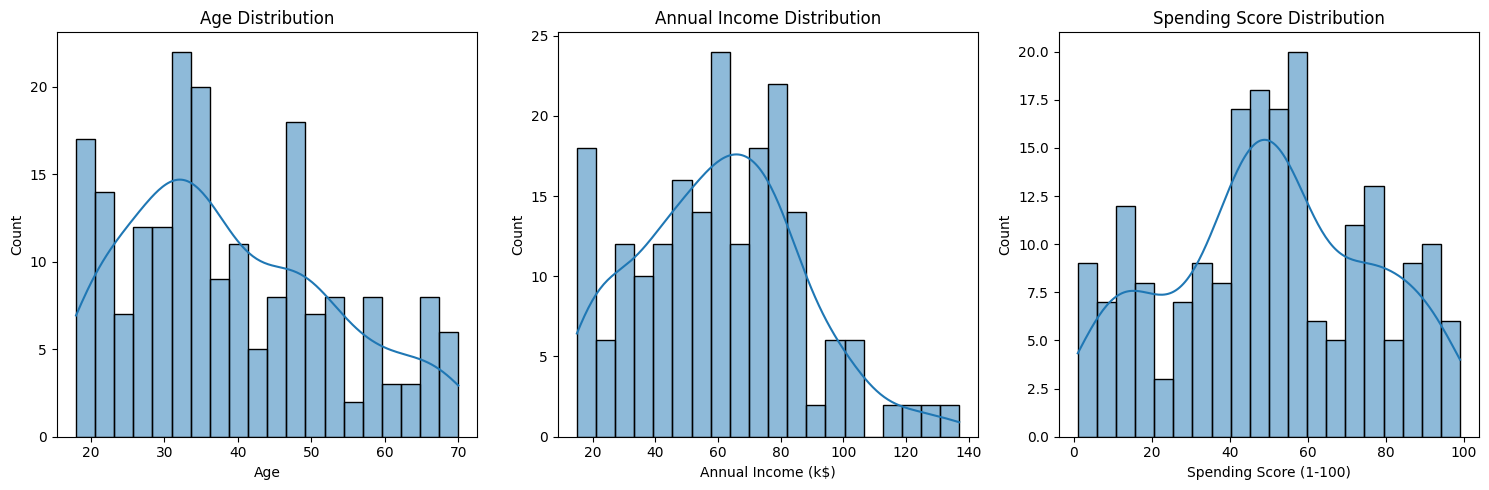

In [17]:
# Visualize the distribution of key features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

In [18]:
# Select features for clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

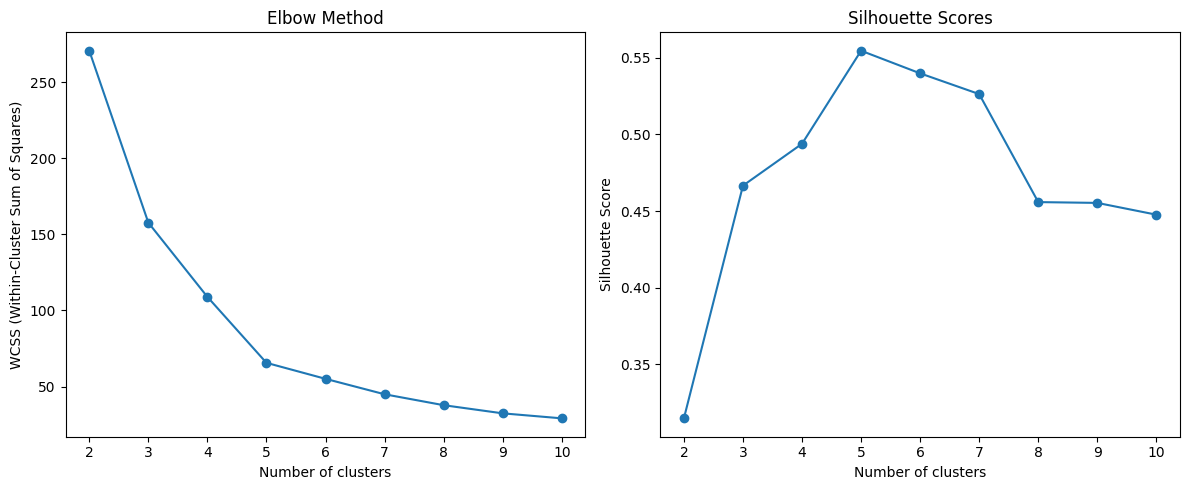

In [19]:
# Plot the Elbow Method graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

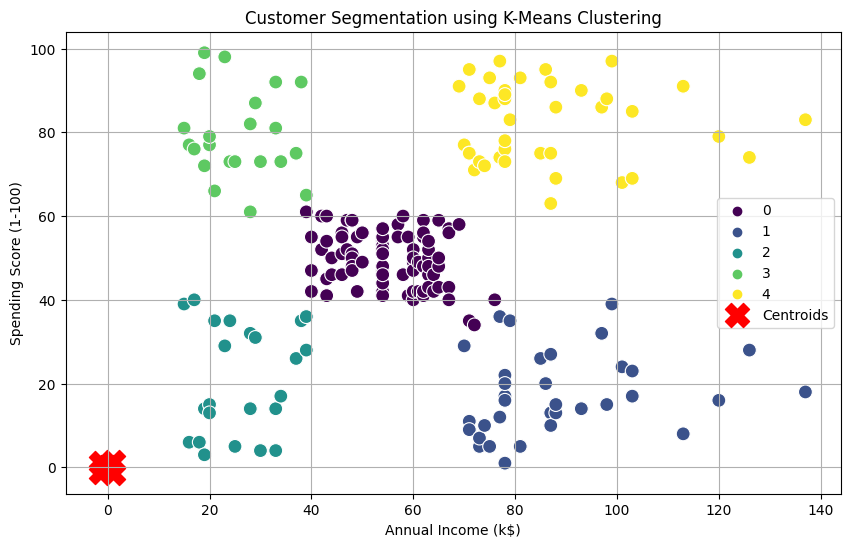

In [20]:
# Based on the plots, select the optimal number of clusters (5 seems good)
optimal_clusters = 5

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.value_counts().idxmax()
}).reset_index()

print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster        Age  Annual Income (k$)  Spending Score (1-100)  Gender
0        0  42.716049           55.296296               49.518519  Female
1        1  41.114286           88.200000               17.114286    Male
2        2  45.217391           26.304348               20.913043  Female
3        3  25.272727           25.727273               79.363636  Female
4        4  32.692308           86.538462               82.128205  Female


In [22]:
# Interpretation of clusters
print("\nCluster Interpretation:")
for i in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Size: {len(cluster_data)} customers")
    print(f"Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"Average Annual Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"Dominant Gender: {cluster_data['Gender'].value_counts().idxmax()}")


Cluster Interpretation:

Cluster 0:
Size: 81 customers
Average Age: 42.7 years
Average Annual Income: $55.3k
Average Spending Score: 49.5
Dominant Gender: Female

Cluster 1:
Size: 35 customers
Average Age: 41.1 years
Average Annual Income: $88.2k
Average Spending Score: 17.1
Dominant Gender: Male

Cluster 2:
Size: 23 customers
Average Age: 45.2 years
Average Annual Income: $26.3k
Average Spending Score: 20.9
Dominant Gender: Female

Cluster 3:
Size: 22 customers
Average Age: 25.3 years
Average Annual Income: $25.7k
Average Spending Score: 79.4
Dominant Gender: Female

Cluster 4:
Size: 39 customers
Average Age: 32.7 years
Average Annual Income: $86.5k
Average Spending Score: 82.1
Dominant Gender: Female
